# **Projet eDOL - ISIMA CLERMONT AUVERGNE INP**

**Ce projet a été réalisé en partenariat avec le laboratoire LIMOS affilié au CNRS, L'Institut Analgesia, et l'Institut d'Informatique de l'INP Clermont Auvergne - Université Clermont Auvergne.**



Réalisé par: IDER Walid | AIT CHRIF Houssam

Professeur encadrant: Dr. BARRA Vincent

Responsable de filière: Dr. ANTOINE Violaine

*Aubière, Auvergne-Rhônes,Alpes , France. 2021-2022.*

*Le langage de programmation utilisé est Python3.*

*L'EDI utilisé lors du développement est Datalore (Jetbrains)*

**Contexte du projet:** 

L'Institut Analgesia est un centre de recherche qui se spécialise dans le traitement des douleurs chroniques.

Les responsables de l'institut reçoivent régulièrement des échantillons de réponses de patients attestant de leur état de santé.

Notre objectif sera d'exploiter ces données afin de soutenir l'Institut Analgesia dans leurs recherches, à l'aide de techniques orientées vers la Science des Données et l'Aide à la décision.

# I- Installation des librairies Python nécessaires à l'exécution de nos programmes

In [1]:
# Bibliothèques de base
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import math
import time
import sklearn as sk
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')


# Bibliothèques ML

import sklearn.svm as sksvm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



#Fichier .csv en entrée: Il s'agit du formulaire rempli par les patients que l'on
#exploitera par la suite


file='BaroProjet.csv'

#Voici la dataframe automatiquement fournie par le fichier précédent
#En pratique, on ne l'utilisera pas

df_0=pd.read_csv(file)

df_0

,user_uuid,container_type,container_uuid,container_title,creation_time,last_modification_time,activity_state,generator_uuid,generator_title,occurrence,...,answer_question_6,question_uuid_7,question_title_7,answer_question_7,question_uuid_8,question_title_8,answer_question_8,question_uuid_9,question_title_9,answer_question_9
0,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-04-15T00:00:42.007640+02:00,2019-04-16T18:42:29.842847+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,1,...,7.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,7.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,5.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,8.0
1,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-04-22T00:00:26.007438+02:00,2019-04-25T18:27:16.464706+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,2,...,5.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,9.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,7.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,9.0
2,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-04-29T00:00:31.679510+02:00,2019-04-29T17:40:30.604698+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,3,...,4.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,9.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,9.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,9.0
3,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-05-06T00:00:54.682867+02:00,2019-05-06T14:51:08.153542+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,4,...,3.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,8.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,8.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,8.0
4,3f25029fcecf4fe3865d4af31f1f5574,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-05-13T00:00:53.672126+02:00,2019-05-13T18:03:13.658840+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,5,...,2.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,8.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,8.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-09-30T00:00:25.256715+02:00,2019-09-30T23:40:20.889188+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,21,...,5.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,8.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,0.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,7.0
2233,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-10-07T00:00:25.306022+02:00,2019-10-09T19:27:23.867067+02:00,done,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,22,...,4.0,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,3.0,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,2.0,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,9.0
2234,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639394ee153cf4a8fe,Baromètres de la semaine écoulée,2019-10-14T00:00:06.263228+02:00,2019-10-14T00:00:06.263228+02:00,missed,5167fd82f13c4f88bd51b8e103d24d07,AG6 Baromètres,23,...,NaN,efff729f1edf485d8face7182d992fe1,Douleur moyenne sur la semaine écoulée,NaN,eaa2caf48f5c41c2b4d7493940605c27,Douleur minimale ressentie,NaN,7f0d3c59dbc14b9aa152fff5cdb75dd4,Douleur maximale ressentie,NaN
2235,7b833db22e294d13b14e7b206f3f5614,form,e4ce9193707a46639

In [2]:
#Ces baromètres sont ceux qui nous intéressent dans notre étude

Dictionnaire_Barometres={
                         1:'Qualité du sommeil sur la semaine écoulée',
                         2:'Moral sur la semaine écoulée',
                         3:'Fatigue/Énergie sur la semaine écoulée',
                         4:'Sensation de confort corporel sur la semaine écoulée',
                         5:'Anxiété sur la semaine écoulée',
                         6:'Douleur moyenne sur la semaine écoulée'}


D=Dictionnaire_Barometres

In [3]:
#Code indiquant le nombre de patients de l'étude, on attribuera à ce nombre la variable N

N=len(df_0['user_uuid'].unique())

print('Le nombre de patients de cette étude est: ',N)

Le nombre de patients de cette étude est:  95


# Ajout de fonctions utiles:

In [4]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_frontiere(clf, window):
    x0s = np.linspace(window[0], window[1], 100)
    x1s = np.linspace(window[2], window[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,  alpha=0.2)
    plt.contourf(x0, x1, y_decision,  alpha=0.1)


def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis(axes)


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    #plt.show()


# II- Création d'un modèle pour notre analyse de données

Nous allons dans cette partie supprimer les données qui nous sont inutiles dans notre étude. Nous conserverons uniquement les 6 baromètres présents dans le dictionnaire ci-dessus.

Nous allons également introduire une notion de "Score Global" qui permettra de centraliser la notion d'état du patient à un instant t sur un seul et unique baromètre.

Les baromètres numéros 5 et 6 ont une connotation négative. On va donc effectuer un ajustement par changement de variable (x=10-x) afin de conserver la correlation positive entre l'amélioration de l'état du patient et l'augmentation des baromètres.

Nous allons donc introduire le Score Global avec la formule suivante:

                                                Score Global = SUM(D[i]) (pour i de 1 à 6)

Il prend donc ses valeurs entre 0 et 60.

In [5]:
###### PARTIE I: Initialisation des données & Introduction de la notion de Score Global

#Nous allons tout d'abord créer une nouvelle DataFrame contenant uniquement ce
#qui nous interesse (c'est à dire les réponses aux questions et les identifiants
#de chaque patient). Nous ne modifierons pas les réponses aux questions
#pour l'instant bien que certaines ne aient une signification "inversée"

def NewDataFrame(OldDF):
    "Transforme la dataframe issue du questionnaire en une dataframe un peu plus exploitable"
    tmp=OldDF.reset_index()
    New=pd.DataFrame(tmp['user_uuid'])
    New['Date_Creation']=tmp['creation_time']
    for i in range(1,7):
        New[Dictionnaire_Barometres[i]]=tmp['answer_question_'+str(i+1)]

    New[D[5]]=10-New[D[5]] # Ajustement
    New[D[6]]=10-New[D[6]] # Ajustement
    return New

df=NewDataFrame(df_0)

# Configuration de df_0 qui servira plus tard lors de la Data Viz
df_0=NewDataFrame(df_0)

df_0.drop(['user_uuid','Date_Creation'],axis=1,inplace=True)
df_0.rename(columns={D[1]: "I", D[2]: "II",D[3]:"III",D[4]:"IV",D[5]:"V",D[6]:"VI"},inplace=True)

## Création du score global
## Celui ci est calculé de la manière suivante:
## Score global =  [Qualité du sommeil] + [Moral] + [Fatigue/Energie] + [sensation de confort corporel] – [anxiété] – [douleur moyenne]

##Script

def CalculScoreGlobal():
    List=[]
    for i in range(len(df)):
        Score=df[D[1]][i]+df[D[2]][i]+df[D[3]][i]+df[D[4]][i]+df[D[5]][i]+df[D[6]][i]
        List.append(Score)
    return List

df['Score_Global']=CalculScoreGlobal()

df

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.0,6.0,3.0,3.0,3.0,3.0,21.0
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.0,6.0,1.0,1.0,5.0,1.0,15.0
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.0,6.0,2.0,2.0,6.0,1.0,18.0
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.0,2.0,2.0,2.0,7.0,2.0,16.0
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.0,1.0,1.0,2.0,8.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,2019-09-30T00:00:25.256715+02:00,6.0,7.0,5.0,5.0,5.0,2.0,30.0
2233,7b833db22e294d13b14e7b206f3f5614,2019-10-07T00:00:25.306022+02:00,4.0,3.0,4.0,4.0,6.0,7.0,28.0
2234,7b833db22e294d13b14e7b206f3f5614,2019-10-14T00:00:06.263228+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235,7b833db22e294d13b14e7b206f3f5614,2019-10-21T00:00:06.302424+02:00,5.0,4.0,2.0,2.0,6.0,7.0,26.0


Ci dessous, le couple *(user_uuid,Date_Creation)* constitue une clé primaire de la base de données.

Remarque: Cette base de données est au format 3FN.

### Liste des scores globaux distincts:

In [6]:
list(df['Score_Global'].unique())

[21.0,
 15.0,
 18.0,
 16.0,
 27.0,
 26.0,
 22.0,
 25.0,
 24.0,
 31.0,
 28.0,
 34.0,
 33.0,
 29.0,
 nan,
 37.0,
 30.0,
 40.0,
 38.0,
 32.0,
 23.0,
 17.0,
 49.0,
 45.0,
 19.0,
 35.0,
 36.0,
 20.0,
 11.0,
 10.0,
 8.0,
 42.0,
 43.0,
 39.0,
 14.0,
 13.0,
 2.0,
 46.0,
 41.0,
 44.0,
 47.0,
 6.0,
 7.0,
 9.0,
 50.0,
 48.0,
 54.0,
 4.0,
 12.0]

### DataFrame des Scores Globaux : 

In [7]:
#### Création de la dataframe des scores globaux

df_s=pd.merge(df['user_uuid'],df['Score_Global'],left_index=True,right_index=True)
df_s.set_index('user_uuid',inplace=True)

#### Description du score global

df_s

,Score_Global
user_uuid,
3f25029fcecf4fe3865d4af31f1f5574,21.0
3f25029fcecf4fe3865d4af31f1f5574,15.0
3f25029fcecf4fe3865d4af31f1f5574,18.0
3f25029fcecf4fe3865d4af31f1f5574,16.0
3f25029fcecf4fe3865d4af31f1f5574,15.0
...,...
7b833db22e294d13b14e7b206f3f5614,30.0
7b833db22e294d13b14e7b206f3f5614,28.0
7b833db22e294d13b14e7b206f3f5614,NaN


### Statistiques au niveau du Score Global de notre échantillon : 

In [8]:
df_s.describe()

,Score_Global
count,1405.000000
mean,29.121708
std,7.779740
min,2.000000
25%,24.000000
50%,29.000000
75%,34.000000
max,54.000000


# III) Visualisation des données

### Graphe d'évolution du Score Global d'un patient fixé: 

,Score_Global
user_uuid,
b25463b516144c10a93fd19edeb12feb,30.0
b25463b516144c10a93fd19edeb12feb,24.0
b25463b516144c10a93fd19edeb12feb,24.0
b25463b516144c10a93fd19edeb12feb,29.0
b25463b516144c10a93fd19edeb12feb,30.0
b25463b516144c10a93fd19edeb12feb,32.0
b25463b516144c10a93fd19edeb12feb,30.0
b25463b516144c10a93fd19edeb12feb,29.0
b25463b516144c10a93fd19edeb12feb,31.0


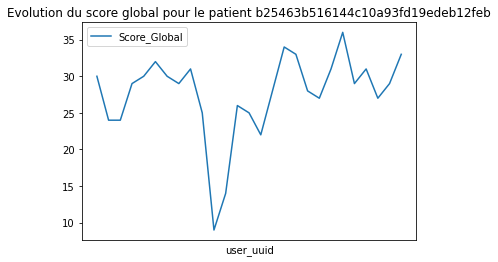

In [9]:
def EvolutionGlobale(user,graph=None):
    tmp=df_s.loc[user]
    if graph:
        frame=tmp.plot()
        frame.axes.get_xaxis().set_ticks([])
        plt.title('Evolution du score global pour le patient '+user)
    
    return tmp

###Exemple de Test
EvolutionGlobale("b25463b516144c10a93fd19edeb12feb", True)

Nous allons maintenant nous intéresser à la fonction dérivée de la fonction représentée par l'application du script ci-dessus .
Nous considérons que notre unité de temps est la semaine. t=1 -> 1 semaine car le questionnaire transmis au patient est rempli de manière hebdomadaire. 

La fonction dérivée est donc en réalité, dans ce cas-ci, la différence entre chaque deux points successifs étant donné le fait que la différence entre deux échantillons esttoujours de t=1.

**Voici donc le graphe de la dérivée de la fonction d'évolution du Score Global pour le patient ci-dessus:**

,Evolution_Of_Index
user_uuid,
b25463b516144c10a93fd19edeb12feb,-6.0
b25463b516144c10a93fd19edeb12feb,0.0
b25463b516144c10a93fd19edeb12feb,5.0
b25463b516144c10a93fd19edeb12feb,1.0
b25463b516144c10a93fd19edeb12feb,2.0
b25463b516144c10a93fd19edeb12feb,-2.0
b25463b516144c10a93fd19edeb12feb,-1.0
b25463b516144c10a93fd19edeb12feb,2.0
b25463b516144c10a93fd19edeb12feb,-6.0


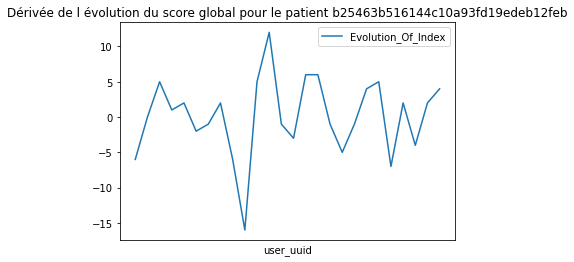

In [10]:
def Derivative(user,graph=None):
    tmp=EvolutionGlobale(user)
    d_tmp=tmp
    List=[]
    for i in range(1,len(d_tmp)):
        List.append(d_tmp['Score_Global'][i]-d_tmp['Score_Global'][i-1])
    d_tmp = d_tmp.iloc[1: , :]
    d_tmp['Evolution_Of_Index']=List
    d_tmp.drop(['Score_Global'],axis=1,inplace=True)
    if graph:
        frame=d_tmp.plot()
        frame.axes.get_xaxis().set_ticks([])
        plt.title('Dérivée de l évolution du score global pour le patient '+user)

    return d_tmp

Derivative('b25463b516144c10a93fd19edeb12feb',True)

### Histogramme du Score Global

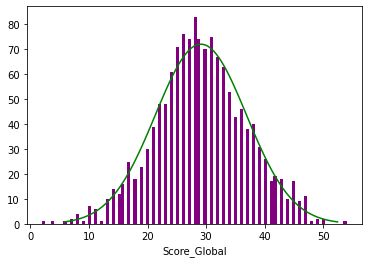

In [11]:
#plt.figure(figsize=(5,4))

fig, ax = plt.subplots(1, 1)
mu = 29.12
sigma = 7.78
Xnormal = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
Ynormal= stats.norm.pdf(Xnormal, mu, sigma)*1405
df_normal=pd.DataFrame([Xnormal,Ynormal])
df_normal=df_normal.T
df_normal.set_index(0,inplace=True)
df['Score_Global'].hist(color='purple',bins=100,label='',ax=ax)
#plt.plot(x, stats.norm.pdf(x, mu, sigma))
df_normal.plot(color='green',ax=ax)
plt.xlabel('Score_Global')
ax.get_legend().remove()

plt.show()


### Impact de la qualité du sommeil sur le Score Global:

<AxesSubplot:xlabel='Score_Global', ylabel='Qualité du sommeil sur la semaine écoulée'>

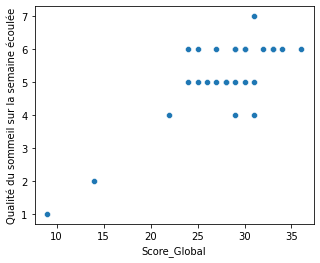

In [12]:
fig, ax= plt.subplots(figsize=(5,4))
sns.scatterplot(data = df[df['user_uuid']=='b25463b516144c10a93fd19edeb12feb'], x = 'Score_Global', y = 'Qualité du sommeil sur la semaine écoulée')

### Heatmap de corrélation entre les colonnes de la DataFrame

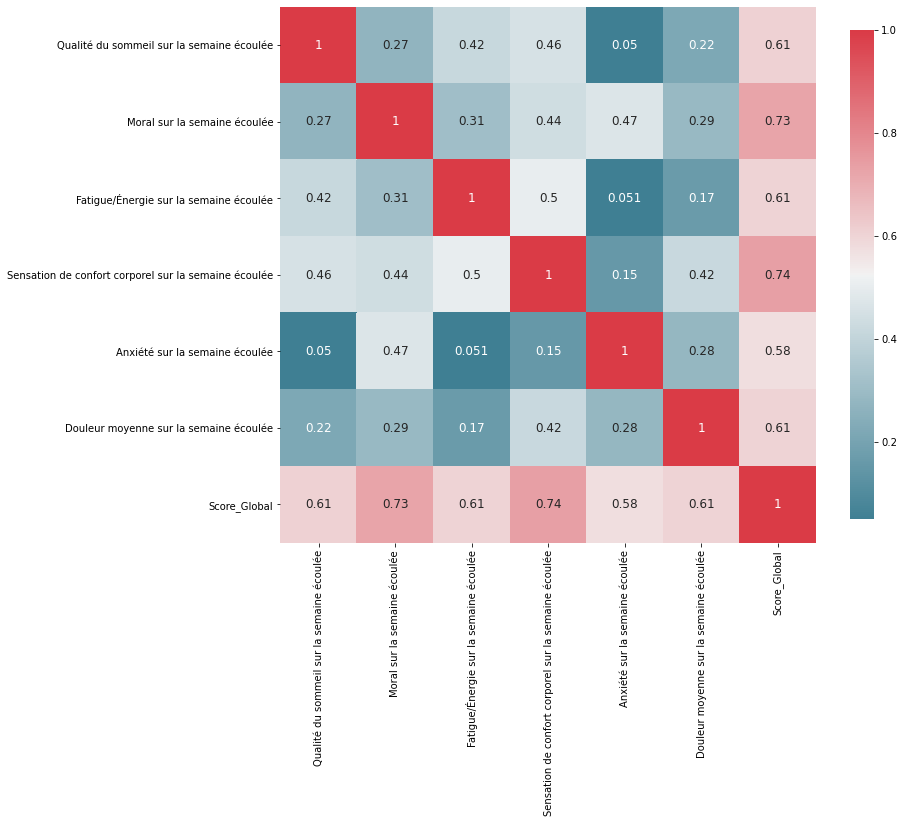

In [13]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(df)

### Clustermap de corrélation entre les colonnes

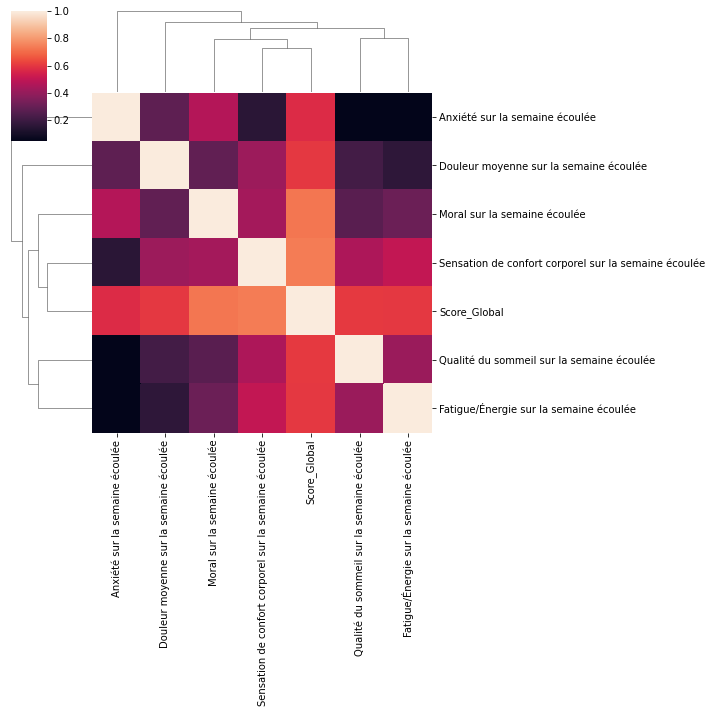

In [14]:
sns.clustermap(df.corr())

### BoxPlots de notre distribution:

<AxesSubplot:>

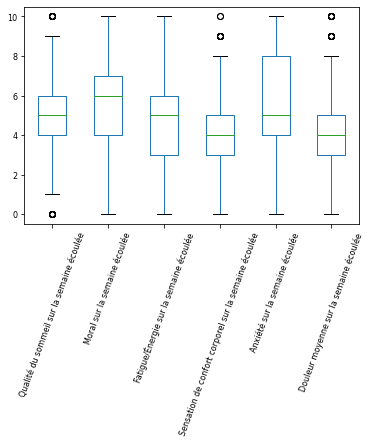

In [15]:
df.boxplot(column=[D[1],D[2],D[3],D[4],D[5],D[6]],grid=False, rot=70, fontsize=8)

<AxesSubplot:>

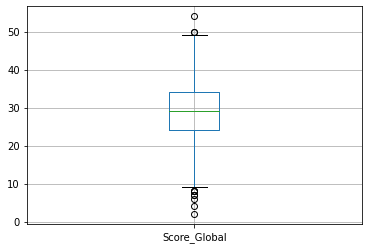

In [16]:
df_s.boxplot()

Ici nous allons nous intéresser à la Scatter Matrix qui permet de visualiser l'évolution de chaque paramètre en fonction des autres indépendemment.

Rappelons, que notre dictionnaire est numéroté de la sorte:

- I: Qualité du sommeil sur la semaine écoulée
- II: Moral sur la semaine écoulée
- III: Fatigue/Énergie sur la semaine écoulée
- IV: Sensation de confort corporel sur la semaine écoulée
- V: Anxiété sur la semaine écoulée
- VI: Douleur moyenne sur la semaine écoulée

**Voici donc la représentation de cette matrice:**

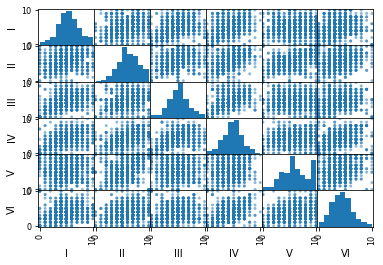

In [17]:

pd.plotting.scatter_matrix(df_0)
plt.show()

***Intégration de Microsoft Power BI au Notebook Jupyer***

In [18]:
#pip install powerbiclient
#Installer powerbiclient si non installé

In [19]:
#from powerbiclient import Report, models


In [20]:
#Ici fenêtre de connexion Microsoft -> https://powerbi.microsoft.com/fr-ca/blog/announcing-power-bi-in-jupyter-notebooks/


# IV) Evaluation des données:

### Rappel de nos données:

In [21]:
df

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.0,6.0,3.0,3.0,3.0,3.0,21.0
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.0,6.0,1.0,1.0,5.0,1.0,15.0
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.0,6.0,2.0,2.0,6.0,1.0,18.0
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.0,2.0,2.0,2.0,7.0,2.0,16.0
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.0,1.0,1.0,2.0,8.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,2019-09-30T00:00:25.256715+02:00,6.0,7.0,5.0,5.0,5.0,2.0,30.0
2233,7b833db22e294d13b14e7b206f3f5614,2019-10-07T00:00:25.306022+02:00,4.0,3.0,4.0,4.0,6.0,7.0,28.0
2234,7b833db22e294d13b14e7b206f3f5614,2019-10-14T00:00:06.263228+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235,7b833db22e294d13b14e7b206f3f5614,2019-10-21T00:00:06.302424+02:00,5.0,4.0,2.0,2.0,6.0,7.0,26.0


### Algorithme de détection de pics de baromètres

In [22]:
S=0
j=6
for i in range(11):
    print("Valeur " + str(i) + " = " , len(df[df[D[j]]==i]))
    S=len(df[df[D[j]]==i])

S/1405

Valeur 0 =  39
Valeur 1 =  96
Valeur 2 =  216
Valeur 3 =  270
Valeur 4 =  298
Valeur 5 =  244
Valeur 6 =  123
Valeur 7 =  61
Valeur 8 =  36
Valeur 9 =  11
Valeur 10 =  11


0.007829181494661922

Nous allons nous focaliser sur un patient fixé pour cette étude, afin de pouvoir lancer la détection sur tous les patients (95 dans cet échantillon).

Sur chaque patient, nous lancerons notre programme sur chacun des six baromètres.

In [23]:
def DetectionBaroPatient(idpatient,idbaro):
    "I: Qualité du sommeil sur la semaine écoulée"
    "II: Moral sur la semaine écoulée"
    "III: Fatigue/Énergie sur la semaine écoulée"
    "IV: Sensation de confort corporel sur la semaine écoulée"
    "V: Anxiété sur la semaine écoulée"
    "VI: Douleur moyenne sur la semaine écoulée"


    tmp=df[df['user_uuid']==idpatient]
    tmp=tmp.reset_index()
    tmp.drop(columns=['index','Score_Global'],inplace=True)
    for i in range(1,7):
        if (i!=idbaro):
            tmp.drop(columns=[D[i]],inplace=True)
    Bool_List=['Non' for i in range(len(tmp))]
    tmp["Suspect?"]=Bool_List

    for i in range(1,len(tmp)-1):
        if ( abs((tmp[D[idbaro]][i]-tmp[D[idbaro]][i-1]))>=4 and abs((tmp[D[idbaro]][i]-tmp[D[idbaro]][i+1]))>=4 ):
            tmp['Suspect?'][i]='Oui'
    return tmp

DetectionBaroPatient('eca78df20d14400c8b74d477700cd529',3)

,user_uuid,Date_Creation,Fatigue/Énergie sur la semaine écoulée,Suspect?
0,eca78df20d14400c8b74d477700cd529,2019-04-10T00:00:36.007028+02:00,4.0,Non
1,eca78df20d14400c8b74d477700cd529,2019-04-15T00:00:42.007640+02:00,6.0,Non
2,eca78df20d14400c8b74d477700cd529,2019-04-22T00:00:26.007438+02:00,10.0,Oui
3,eca78df20d14400c8b74d477700cd529,2019-04-29T00:00:31.679510+02:00,5.0,Non
4,eca78df20d14400c8b74d477700cd529,2019-05-06T00:00:54.682867+02:00,4.0,Non
5,eca78df20d14400c8b74d477700cd529,2019-05-13T00:00:53.672126+02:00,7.0,Non
6,eca78df20d14400c8b74d477700cd529,2019-05-20T00:00:00.599063+02:00,5.0,Non
7,eca78df20d14400c8b74d477700cd529,2019-05-27T00:00:42.735778+02:00,7.0,Non
8,eca78df20d14400c8b74d477700cd529,2019-06-03T00:00:38.442274+02:00,4.0,Non
9,eca78df20d14400c8b74d477700cd529,2019-06-10T00:00:32.034495+02:00,3.0,Non


Nous allons maintenant appliquer ce programme à un patient fixé, pour les six baromètres, et créer une sous fonction qui déterminera le nombre d'anomalies potentielles dans les données relatives à ce patient.

In [24]:
def NumberOfPotentialErrors(idpatient):
    "Detecte le nombre potentiel d'erreurs dans les données en appliquant l'algorithme précédent"
    N=0
    for i in range(1,7):
        tmp=DetectionBaroPatient(idpatient,i)
        N=N+ len(tmp[tmp['Suspect?']=='Oui'])
    return N


NumberOfPotentialErrors('eca78df20d14400c8b74d477700cd529')


10

Il nous suffit maintenant d'appliquer la fonction ci-dessus à la totalité de notre échantillon pour détecter le nombre d'anomalies de pics de baromètres selon les contraintes qui nous ont été imposées par l'Institut Analgesia.

In [25]:
TotalError=0
for i in (df['user_uuid'].unique()):
    if (NumberOfPotentialErrors(i)!=0):
        print("Anomalie détectée dans les réponses du patient numéro "+ i)
    TotalError=TotalError + NumberOfPotentialErrors(i)

print("Nombre total d'anomalies détectées: "+ str(TotalError))

Anomalie détectée dans les réponses du patient numéro 4cce48e881714fe4a3f8d74b54752a9a
Anomalie détectée dans les réponses du patient numéro f296deeb07c84cc2a4c2e9c0b923ce6b
Anomalie détectée dans les réponses du patient numéro 18cc2ff4f7454546854fdd46cdc8d43e
Anomalie détectée dans les réponses du patient numéro 1c4e8d6092ca4627855539e41c131515
Anomalie détectée dans les réponses du patient numéro fd2366757ce14d4087cbbf8e12a8626e
Anomalie détectée dans les réponses du patient numéro 58c8247eb89a4e4d88f280dc53098209
Anomalie détectée dans les réponses du patient numéro a77e62de16624034943dc06f4ece2579
Anomalie détectée dans les réponses du patient numéro 88399190055a415cb82452f72ea98c66
Anomalie détectée dans les réponses du patient numéro eca78df20d14400c8b74d477700cd529
Anomalie détectée dans les réponses du patient numéro 9b70bf6d45434a7a83ab343ed1386c6b
Anomalie détectée dans les réponses du patient numéro 9f8e5ccebdbc4ca0ab626fcc8a72a3a3
Anomalie détectée dans les réponses du pati

### Algorithme de détection d'évolutions absurdes

**Nous allons maintenant nous intéresser à deux cas de figures qui sont absurdes et semblent donc importants à détecter dans notre échantillon de données.**

Les cas sont les suivants:

- Evolution de la sensation de confort corporel (4) et de la douleur (6) dans le même sens.
- Evolution de l'anxiété (5) et du moral (2) dans le même sens.

Nous allons pour cela créer deux DataFrames à partir de notre DataFrame principale "df".

In [26]:
df_46=df.drop(columns=[D[1],D[2],D[3],D[5],'Score_Global']) #Cela ne change pas la DataFrame df comme on a pas précisé "inplace=True"
df_52=df.drop(columns=[D[1],D[4],D[3],D[6],'Score_Global'])

df_46
#df_52

,user_uuid,Date_Creation,Sensation de confort corporel sur la semaine écoulée,Douleur moyenne sur la semaine écoulée
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.0,3.0
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.0,1.0
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,2.0,1.0
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,2.0,2.0
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,2.0,2.0
...,...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,2019-09-30T00:00:25.256715+02:00,5.0,2.0
2233,7b833db22e294d13b14e7b206f3f5614,2019-10-07T00:00:25.306022+02:00,4.0,7.0
2234,7b833db22e294d13b14e7b206f3f5614,2019-10-14T00:00:06.263228+02:00,NaN,NaN
2235,7b833db22e294d13b14e7b206f3f5614,2019-10-21T00:00:06.302424+02:00,2.0,7.0


Nous allons maintenant pour chacune des deux DataFrames créer une colonne permettant de détecter quand les deux baromètres évoluent dans le même sens, ce qui est considéré comme une anomalie illogique.

In [27]:
def MauvaiseEvolutionDetect46(idpatient):
    "Detecte une évolution absurde dans les baromètres 4 et 6"
    tmp=df_46[df_46['user_uuid']==idpatient]
    tmp=tmp.reset_index()
    List=['Non' for k in range(len(tmp))]
    for i in range(1,len(tmp)-1):
        if (np.isnan((tmp[D[4]][i])) or np.isnan((tmp[D[4]][i-1])) or np.isnan((tmp[D[6]][i])) or np.isnan((tmp[D[6]][i-1]))):
            i=i+2
        elif ((tmp[D[4]][i]-tmp[D[4]][i-1])*(tmp[D[6]][i]-tmp[D[6]][i-1]) > 0 ):
            List[i]='Oui'
    tmp['Suspect?']=List
    return tmp

MauvaiseEvolutionDetect46('101f04c6c7714ad9bb2b03dfeeba8ee2')

,index,user_uuid,Date_Creation,Sensation de confort corporel sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Suspect?
0,26,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-04-20T00:00:17.007240+02:00,3.0,3.0,Non
1,27,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-04-22T00:00:26.007438+02:00,4.0,3.0,Non
2,28,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-04-29T00:00:31.679510+02:00,4.0,4.0,Non
3,29,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-06T00:00:54.682867+02:00,2.0,3.0,Oui
4,30,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-13T00:00:53.672126+02:00,4.0,2.0,Non
5,31,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-20T00:00:00.599063+02:00,3.0,3.0,Non
6,32,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-27T00:00:42.735778+02:00,4.0,4.0,Oui
7,33,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-06-03T00:00:38.442274+02:00,6.0,5.0,Oui
8,34,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-06-10T00:00:32.034495+02:00,5.0,6.0,Non
9,35,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-06-17T00:00:33.781735+02:00,4.0,4.0,Oui


In [28]:
def MauvaiseEvolutionDetect52(idpatient):
    "Detecte une évolution absurde dans les baromètres 2 et 5"
    tmp=df_52[df_52['user_uuid']==idpatient]
    tmp=tmp.reset_index()
    List=['Non' for k in range(len(tmp))]
    for i in range(1,len(tmp)-1):
        if (np.isnan((tmp[D[5]][i])) or np.isnan((tmp[D[5]][i-1])) or np.isnan((tmp[D[2]][i])) or np.isnan((tmp[D[2]][i-1]))):
            i=i+2
        elif ((tmp[D[2]][i]-tmp[D[2]][i-1])*(tmp[D[5]][i]-tmp[D[5]][i-1]) > 0 ):
            List[i]='Oui'
    tmp['Suspect?']=List
    return tmp

MauvaiseEvolutionDetect52('3f25029fcecf4fe3865d4af31f1f5574')

,index,user_uuid,Date_Creation,Moral sur la semaine écoulée,Anxiété sur la semaine écoulée,Suspect?
0,0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,6.0,3.0,Non
1,1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,6.0,5.0,Non
2,2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,6.0,6.0,Non
3,3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,2.0,7.0,Non
4,4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.0,8.0,Non
5,5,3f25029fcecf4fe3865d4af31f1f5574,2019-05-20T00:00:00.599063+02:00,7.0,9.0,Oui
6,6,3f25029fcecf4fe3865d4af31f1f5574,2019-05-27T00:00:42.735778+02:00,8.0,10.0,Oui
7,7,3f25029fcecf4fe3865d4af31f1f5574,2019-06-03T00:00:38.442274+02:00,7.0,10.0,Non
8,8,3f25029fcecf4fe3865d4af31f1f5574,2019-06-10T00:00:32.034495+02:00,5.0,10.0,Non
9,9,3f25029fcecf4fe3865d4af31f1f5574,2019-06-17T00:00:33.781735+02:00,7.0,10.0,Non


On utilisera alors le programme ci-dessous pour détecter le nombre d'anomalies potentielles chez un patient fixé en se basant sur ce que l'on a fait ci-dessus.

In [29]:
def NombreErrEvolPatient(idpatient):
    "Détecte le nombre d'anomalies chez un patient fixé dans le cadre de l'évolution absurde de certains baromètres"
    N=0
    tmp=MauvaiseEvolutionDetect46(idpatient)
    N=N+ len(tmp[tmp['Suspect?']=='Oui'])
    tmp=MauvaiseEvolutionDetect52(idpatient)
    N=N+ len(tmp[tmp['Suspect?']=='Oui'])
    return N

MauvaiseEvolutionDetect46('101f04c6c7714ad9bb2b03dfeeba8ee2')

,index,user_uuid,Date_Creation,Sensation de confort corporel sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Suspect?
0,26,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-04-20T00:00:17.007240+02:00,3.0,3.0,Non
1,27,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-04-22T00:00:26.007438+02:00,4.0,3.0,Non
2,28,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-04-29T00:00:31.679510+02:00,4.0,4.0,Non
3,29,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-06T00:00:54.682867+02:00,2.0,3.0,Oui
4,30,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-13T00:00:53.672126+02:00,4.0,2.0,Non
5,31,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-20T00:00:00.599063+02:00,3.0,3.0,Non
6,32,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-05-27T00:00:42.735778+02:00,4.0,4.0,Oui
7,33,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-06-03T00:00:38.442274+02:00,6.0,5.0,Oui
8,34,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-06-10T00:00:32.034495+02:00,5.0,6.0,Non
9,35,101f04c6c7714ad9bb2b03dfeeba8ee2,2019-06-17T00:00:33.781735+02:00,4.0,4.0,Oui


In [30]:
TotalError=0
for i in (df['user_uuid'].unique()):
    if (NombreErrEvolPatient(i)!=0):
        print("Anomalie détectée dans les réponses du patient numéro "+ i)
    TotalError=TotalError + NombreErrEvolPatient(i)

print("Nombre total d'anomalies détectées: "+ str(TotalError))

Anomalie détectée dans les réponses du patient numéro 3f25029fcecf4fe3865d4af31f1f5574
Anomalie détectée dans les réponses du patient numéro 101f04c6c7714ad9bb2b03dfeeba8ee2
Anomalie détectée dans les réponses du patient numéro 71c5c29b0c2246ada523afedd2cc054f
Anomalie détectée dans les réponses du patient numéro f296deeb07c84cc2a4c2e9c0b923ce6b
Anomalie détectée dans les réponses du patient numéro 9b0a3a64f2f84e0eacebd8ab1c48c0af
Anomalie détectée dans les réponses du patient numéro a200054d40eb4f9dba182419ac5f30e4
Anomalie détectée dans les réponses du patient numéro 18cc2ff4f7454546854fdd46cdc8d43e
Anomalie détectée dans les réponses du patient numéro 1c4e8d6092ca4627855539e41c131515
Anomalie détectée dans les réponses du patient numéro fd2366757ce14d4087cbbf8e12a8626e
Anomalie détectée dans les réponses du patient numéro acd07009e5f5418caea0f7cf7b2240a9
Anomalie détectée dans les réponses du patient numéro 37c7c9dd3a21491e8602ede7cce2bb7d
Anomalie détectée dans les réponses du pati

### Analyse de l'abstention de réponse dans l'échantillon

Nous allons tout d'abord créer une version de notre DataFrame adaptée aux réponses/non-réponses.

On notera que lorsqu'un NaN est présent, il l'est sur toute la ligne. C'est à dire que le patient répond soit à tout, soit à rien.

Nous allons donc créer une matrice contenant le user_uuid ainsi que la date de chaque réponse, suivis d'un 1 en cas de réponse et 0 en cas d'abstention.

In [31]:
df_reponses=df.drop(columns=[D[2],D[3],D[4],D[5],D[6],'Score_Global'])
for i in range(len(df_reponses)):
    if np.isnan(df_reponses[D[1]][i]):
        df_reponses[D[1]][i]=0
    else:
        df_reponses[D[1]][i]=1
df_reponses.rename(columns={D[1]:"Bool_Reponse"},inplace=True)
df_reponses

,user_uuid,Date_Creation,Bool_Reponse
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,1.0
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.0
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.0
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.0
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.0
...,...,...,...
2232,7b833db22e294d13b14e7b206f3f5614,2019-09-30T00:00:25.256715+02:00,1.0
2233,7b833db22e294d13b14e7b206f3f5614,2019-10-07T00:00:25.306022+02:00,1.0
2234,7b833db22e294d13b14e7b206f3f5614,2019-10-14T00:00:06.263228+02:00,0.0
2235,7b833db22e294d13b14e7b206f3f5614,2019-10-21T00:00:06.302424+02:00,1.0


Nous allons, à partir de cette DataFrame ci-dessus, établir une matrice introduisant les notions de "Assiduité" et "Successivité":

- Assiduité: Nombre de participations (réponse non vide) / Nombre total de réponses 
- Successivité: Le maximum de non-réponses successives 

In [32]:
def Assiduite(df):
    "Fournit le taux d'assiduité d'un patient fixé"
    ListAssid=[]
    for i in df["user_uuid"].unique():
        tmp=df[df["user_uuid"]==i]
        tmp.reset_index(inplace=True)
        S=0
        for j in range(len(tmp)):
            S=S+tmp["Bool_Reponse"][j]
        S=S/len(tmp)
        ListAssid.append((round((S*100),2)))
    return ListAssid

#Assiduite(df_reponses)

def Successivite(df):
    "Fournit la successivité maximale de non-réponses pour chaque patient"
    ListSucc=[]
    for i in df["user_uuid"].unique():
        tmp=df[df["user_uuid"]==i]
        tmp.reset_index(inplace=True)
        cour=0
        Max=0
        for j in range(len(tmp)):
            if tmp["Bool_Reponse"][j]==0:
                cour=cour+1
            if cour>Max:
                Max=cour
            if tmp["Bool_Reponse"][j]==1:
                cour=0
        ListSucc.append(Max)
    return ListSucc

#Successivite(df_reponses)


        

On en déduit donc à partir des deux fonctions précedentes la DataFrame suivante:

In [33]:
L1=list(df["user_uuid"].unique())
L2=Assiduite(df_reponses)
L3=Successivite(df_reponses)

df_abstention=pd.DataFrame(L1)
df_abstention["Taux d'assiduité (en %)"]=L2
df_abstention["Maximum de successivité des NaN"]=L3
df_abstention

,0,Taux d'assiduité (en %),Maximum de successivité des NaN
0,3f25029fcecf4fe3865d4af31f1f5574,96.15,1
1,101f04c6c7714ad9bb2b03dfeeba8ee2,62.96,9
2,4cce48e881714fe4a3f8d74b54752a9a,22.22,17
3,71c5c29b0c2246ada523afedd2cc054f,29.63,7
4,f296deeb07c84cc2a4c2e9c0b923ce6b,100.00,0
...,...,...,...
90,6787c78174f1433f8162ceb302de6afc,66.67,1
91,a6e8f9cf825e4744a64a27f0915b2a20,96.00,1
92,889759d020914ed4a2e0f9fda1e680c0,100.00,0
93,9aa476e4f58944fa867c8f49cf78e158,88.00,1


In [34]:
df_abstention.describe()

,Taux d'assiduité (en %),Maximum de successivité des NaN
count,95.000000,95.000000
mean,63.400842,6.810526
std,35.504041,8.485651
min,0.000000,0.000000
25%,27.670000,1.000000
50%,76.000000,2.000000
75%,96.300000,14.500000
max,100.000000,27.000000


# V) Application des méthodes d'Apprentissage Statistique (ML) sur notre échantillon:

### Analyse des séries temporelles:

Rappelons notre DataFrame des scores globaux (à laquelle on ajoute les dates), puis fixons un utilisateur précis.

<Figure size 432x288 with 0 Axes>

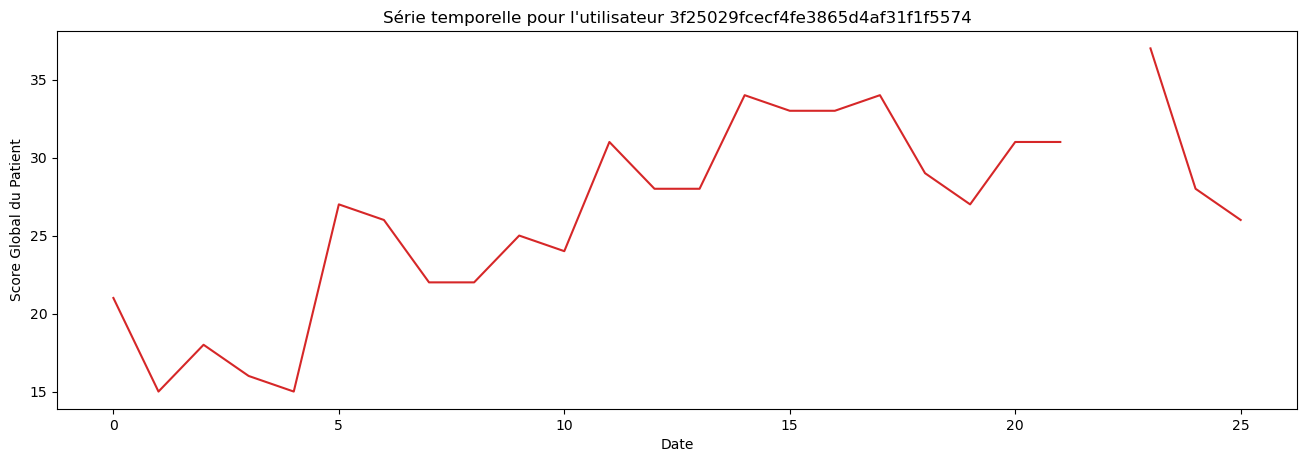

In [35]:
df_timeseries=df.drop(columns=[D[1],D[2],D[3],D[4],D[5],D[6]])
timeseries_user="3f25029fcecf4fe3865d4af31f1f5574"
df_timeseries=df_timeseries[df_timeseries['user_uuid']==timeseries_user]
plt.figure()
plot_df(df_timeseries,x=[i for i in range(len(df_timeseries))],y=df_timeseries['Score_Global'],title="Série temporelle pour l'utilisateur "+timeseries_user,ylabel='Score Global du Patient')

### Il faut d'abord gérer la présence des valeurs NaN.

In [36]:
ListUserNan=[]
ListReject=[]
tmp_df=pd.DataFrame()
for u in df['user_uuid'].unique():
    tmp_df=df[df['user_uuid']==u].reset_index()
    bool=False
    bool2=False
    for i in range(len(tmp_df)):
        if np.isnan(tmp_df[D[1]][i]):
            bool=True
        elif not (np.isnan(tmp_df[D[1]][i])):
            bool2=True
    if bool & bool2:
        ListUserNan.append(u)
    if bool and (not (bool2)):
        ListReject.append(u)



ListUserNotNan=list(set(df['user_uuid'].unique())-set(ListUserNan)-set(ListReject)) # Liste des utilisateurs n'ayant aucune réponse vide

len(ListUserNan) # Liste des utilisateurs ayant au moins une réponse vide mais pas toutes les réponses vides

70

In [37]:
def FillValueFromDf(user):
    imputed=pd.DataFrame()
    tmp_df=df[df['user_uuid']==user]
    imputed['user_uuid']=tmp_df['user_uuid']
    imputed['Date_Creation']=tmp_df['Date_Creation']
    for i in range(1,7):
        imputed[D[i]]=tmp_df[D[i]].fillna(tmp_df[D[i]].mean())
    imputed['Score_Global']=imputed[D[1]]+imputed[D[2]]+imputed[D[3]]+imputed[D[4]]+imputed[D[5]]+imputed[D[6]]
    return imputed

#FillValueFromDf('a5cf1e8612c2473dbdaff70fcd37a4e5')

In [38]:
df_not_nan=pd.DataFrame()
        

df_not_nan=df[df['user_uuid']==ListUserNotNan[0]].copy()
for i in range(1,len(ListUserNotNan)):
    df_not_nan=pd.concat([df_not_nan,df[df['user_uuid']==ListUserNotNan[i]]])

df_not_nan.reset_index(inplace=True)
df_not_nan.drop(columns=['index'],inplace=True)
df_not_nan

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
0,0019879d0680402cb78df6ecc55f587b,2019-05-14T00:00:13.674411+02:00,8.0,5.0,6.0,3.0,4.0,2.0,28.0
1,0019879d0680402cb78df6ecc55f587b,2019-05-20T00:00:00.599063+02:00,8.0,2.0,7.0,3.0,7.0,5.0,32.0
2,0019879d0680402cb78df6ecc55f587b,2019-05-27T00:00:42.735778+02:00,8.0,3.0,3.0,4.0,3.0,2.0,23.0
3,0019879d0680402cb78df6ecc55f587b,2019-06-03T00:00:38.442274+02:00,8.0,2.0,5.0,2.0,2.0,2.0,21.0
4,0019879d0680402cb78df6ecc55f587b,2019-06-10T00:00:32.034495+02:00,8.0,2.0,5.0,2.0,8.0,2.0,27.0
...,...,...,...,...,...,...,...,...,...
436,6a528922e74d4534bb963826b92946b2,2019-07-08T00:00:38.402368+02:00,5.0,5.0,3.0,4.0,5.0,4.0,26.0
437,6a528922e74d4534bb963826b92946b2,2019-07-15T00:00:30.952243+02:00,4.0,5.0,5.0,4.0,3.0,4.0,25.0
438,6a528922e74d4534bb963826b92946b2,2019-07-22T00:00:45.807258+02:00,6.0,5.0,4.0,6.0,5.0,4.0,30.0
439,6a528922e74d4534bb963826b92946b2,2019-07-29T00:00:46.768377+02:00,4.0,5.0,4.0,4.0,4.0,6.0,27.0


In [39]:
df_nan=pd.DataFrame()

df_nan=FillValueFromDf(ListUserNan[0])
for i in range(1,len(ListUserNan)):
    df_nan=pd.concat([df_nan,FillValueFromDf(ListUserNan[i])])

df_nan.reset_index(inplace=True)
df_nan.drop(columns=['index'],inplace=True)
df_nan

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.000000,6.0,3.000000,3.000000,3.000000,3.000000,21.000000
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.000000,6.0,1.000000,1.000000,5.000000,1.000000,15.000000
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.000000,6.0,2.000000,2.000000,6.000000,1.000000,18.000000
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.000000,2.0,2.000000,2.000000,7.000000,2.000000,16.000000
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.000000,1.0,1.000000,2.000000,8.000000,2.000000,15.000000
...,...,...,...,...,...,...,...,...,...
1677,7b833db22e294d13b14e7b206f3f5614,2019-09-30T00:00:25.256715+02:00,6.000000,7.0,5.000000,5.000000,5.000000,2.000000,30.000000
1678,7b833db22e294d13b14e7b206f3f5614,2019-10-07T00:00:25.306022+02:00,4.000000,3.0,4.000000,4.000000,6.000000,7.000000,28.000000
1679,7b833db22e294d13b14e7b206f3f5614,2019-10-14T00:00:06.263228+02:00,4.333333,5.0,4.333333,4.166667,6.166667,5.333333,29.333333
1680,7b833db22e294d13b14e7b206f3f5614,2019-10-21T00:00:06.302424+02:00,5.000000,4.0,2.000000,2.000000,6.000000,7.000000,26.000000


Ici xtrain ne contient que les attributs -> D'où l'utilisation de la fonction .drop()

In [40]:
xtrain=np.array(df_nan.drop(columns=['user_uuid','Date_Creation','Score_Global']))
ytrain=np.array(df_nan['Score_Global'])

xtest=np.array(df_not_nan.drop(columns=['user_uuid','Date_Creation','Score_Global']))
ytest=np.array(df_not_nan['Score_Global'])


In [41]:
svm_model=sksvm.SVR(kernel='rbf')
svm_model.fit(xtrain,ytrain)

score_svr=svm_model.score(xtest,ytest)

rscore_svr=round(score_svr,4)

In [42]:
print("Score de la régression: ", str(rscore_svr*100)+ " %")

Score de la régression:  92.41 %


Nous avons donc obtenu un score satisfaisant. Nous considérons donc que le modèle est validé.

Nous pouvons visualiser le résultat ci-dessous

In [43]:
ypred=svm_model.predict(xtest)

Text(0.5, 1.0, 'Résultat du modèle sur le Score Global')

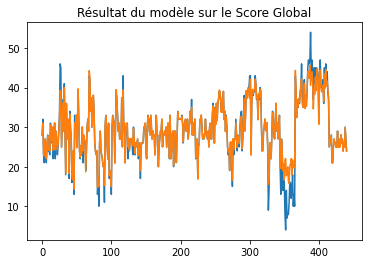

In [44]:
plt.plot(ytest)
plt.plot(ypred)
plt.title('Résultat du modèle sur le Score Global')

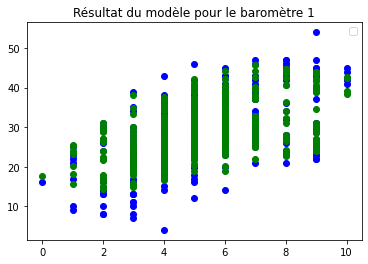

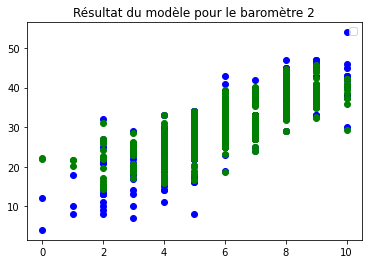

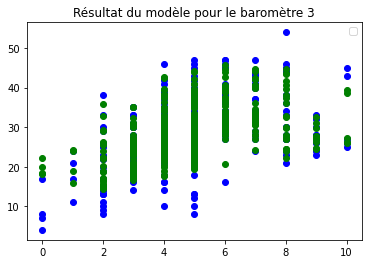

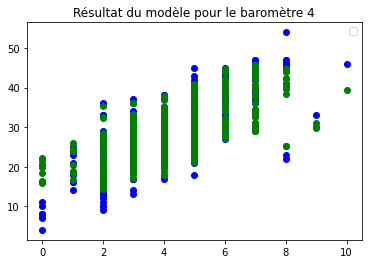

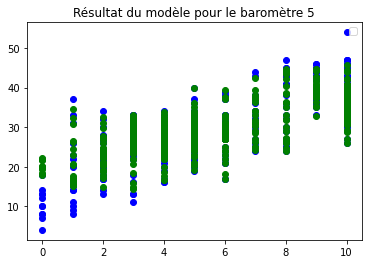

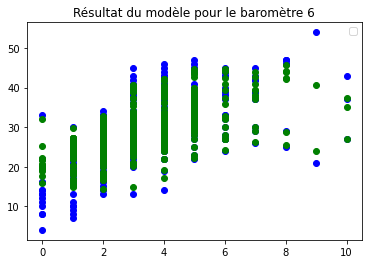

In [45]:

for i in range(1,7):
    plt.subplots()
    plt.plot(np.array(df_not_nan[D[i]]),ytest,'bo')
    plt.plot(np.array(df_not_nan[D[i]]),ypred,'go')
    plt.legend('Data','RBF Model')
    plt.title("Résultat du modèle pour le baromètre " + str(i))


In [46]:
df2=pd.concat([df_nan,df_not_nan])

In [47]:
df2

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.0,6.0,3.0,3.0,3.0,3.0,21.0
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.0,6.0,1.0,1.0,5.0,1.0,15.0
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.0,6.0,2.0,2.0,6.0,1.0,18.0
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.0,2.0,2.0,2.0,7.0,2.0,16.0
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.0,1.0,1.0,2.0,8.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...
436,6a528922e74d4534bb963826b92946b2,2019-07-08T00:00:38.402368+02:00,5.0,5.0,3.0,4.0,5.0,4.0,26.0
437,6a528922e74d4534bb963826b92946b2,2019-07-15T00:00:30.952243+02:00,4.0,5.0,5.0,4.0,3.0,4.0,25.0
438,6a528922e74d4534bb963826b92946b2,2019-07-22T00:00:45.807258+02:00,6.0,5.0,4.0,6.0,5.0,4.0,30.0
439,6a528922e74d4534bb963826b92946b2,2019-07-29T00:00:46.768377+02:00,4.0,5.0,4.0,4.0,4.0,6.0,27.0


La Dataframe df2 est df privée des valeurs vides. Elle contient moins de colonnes à cause des patients ayant un taux d'assiduité de 0% -> Impossible d'imputer de valeurs en absence de données.

In [48]:
df2.describe()

,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,4.855215,5.639877,4.720155,4.259366,5.680811,3.823388,28.978812
std,1.860547,1.849781,1.748847,1.668953,2.297851,1.731264,7.007172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000000,4.727273,4.000000,3.000000,4.000000,3.000000,24.400000
50%,5.000000,5.666667,5.000000,4.000000,5.409091,4.000000,29.000000
75%,6.000000,7.000000,6.000000,5.157895,7.000000,5.000000,33.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,54.000000


**Passons maintenant à une analyse de séries temporelles.**

In [49]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Frontières - Intervalles de confiance")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Vraies valeurs")
    plt.legend(loc="upper left")
    plt.grid(True)

<Figure size 432x288 with 0 Axes>

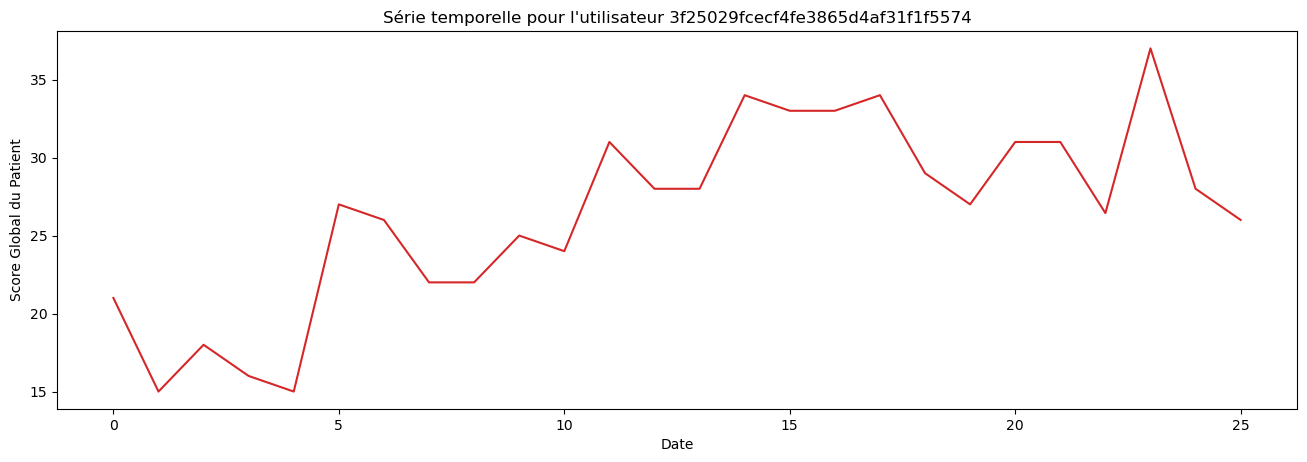

In [50]:
df_timeseries=df2.drop(columns=[D[1],D[2],D[3],D[4],D[5],D[6]])
timeseries_user="3f25029fcecf4fe3865d4af31f1f5574"
df_timeseries=df_timeseries[df_timeseries['user_uuid']==timeseries_user]
plt.figure()
plot_df(df_timeseries,x=[i for i in range(len(df_timeseries))],y=df_timeseries['Score_Global'],title="Série temporelle pour l'utilisateur "+timeseries_user,ylabel='Score Global du Patient')

In [51]:
y1=(df_timeseries.reset_index())['Score_Global']
y1

0     21.00
1     15.00
2     18.00
3     16.00
4     15.00
5     27.00
6     26.00
7     22.00
8     22.00
9     25.00
10    24.00
11    31.00
12    28.00
13    28.00
14    34.00
15    33.00
16    33.00
17    34.00
18    29.00
19    27.00
20    31.00
21    31.00
22    26.44
23    37.00
24    28.00
25    26.00
Name: Score_Global, dtype: float64

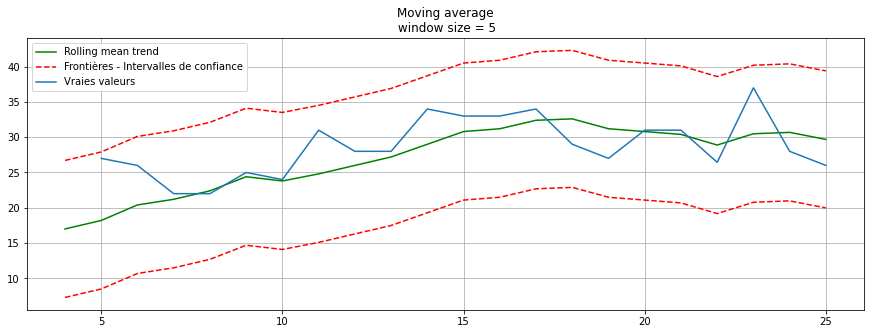

In [52]:

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

plotMovingAverage(y1,5,plot_intervals=True,plot_anomalies=False)

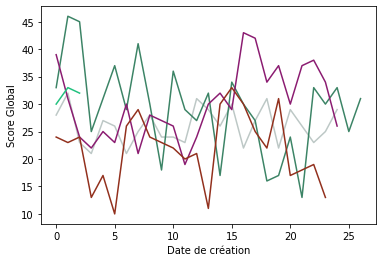

In [53]:
import random
xlabel='Date de création'
ylabel='Score Global'
dpi=100
title=""
list5=df2['user_uuid'].unique()
for i in list5[70:75]:
    df_timeseries=df2.drop(columns=[D[1],D[2],D[3],D[4],D[5],D[6]])
    timeseries_user=i
    df_timeseries=df_timeseries[df_timeseries['user_uuid']==timeseries_user]
    x=[i for i in range(len(df_timeseries))]
    y=df_timeseries['Score_Global']
    #plot_df(df_timeseries,x=[i for i in range(len(df_timeseries))],y=df_timeseries['Score_Global'],title="Série temporelle pour l'utilisateur "+timeseries_user,ylabel='Score Global du Patient')
    #plt.figure(figsize=(16,5), dpi=dpi)
    rgb = (random.random(), random.random(), random.random())
    plt.plot(x, y, color=rgb)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Score Global', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    #plt.show()
    

In [54]:
from sklearn.linear_model import LinearRegression
timeseries_user="3f25029fcecf4fe3865d4af31f1f5574"
df3=df2[df2['user_uuid']==timeseries_user]

In [55]:
df3

,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global
0,3f25029fcecf4fe3865d4af31f1f5574,2019-04-15T00:00:42.007640+02:00,3.00,6.0,3.00,3.00,3.00,3.0,21.00
1,3f25029fcecf4fe3865d4af31f1f5574,2019-04-22T00:00:26.007438+02:00,1.00,6.0,1.00,1.00,5.00,1.0,15.00
2,3f25029fcecf4fe3865d4af31f1f5574,2019-04-29T00:00:31.679510+02:00,1.00,6.0,2.00,2.00,6.00,1.0,18.00
3,3f25029fcecf4fe3865d4af31f1f5574,2019-05-06T00:00:54.682867+02:00,1.00,2.0,2.00,2.00,7.00,2.0,16.00
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.00,1.0,1.00,2.00,8.00,2.0,15.00
5,3f25029fcecf4fe3865d4af31f1f5574,2019-05-20T00:00:00.599063+02:00,2.00,7.0,2.00,3.00,9.00,4.0,27.00
6,3f25029fcecf4fe3865d4af31f1f5574,2019-05-27T00:00:42.735778+02:00,1.00,8.0,1.00,2.00,10.00,4.0,26.00
7,3f25029fcecf4fe3865d4af31f1f5574,2019-06-03T00:00:38.442274+02:00,1.00,7.0,1.00,1.00,10.00,2.0,22.00
8,3f25029fcecf4fe3865d4af31f1f5574,2019-06-10T00:00:32.034495+02:00,1.00,5.0,1.00,2.00,10.00,3.0,22.00
9,3f25029fcecf4fe3865d4af31f1f5574,2019-06-17T00:00:33.781735+02:00,2.00,7.0,1.00,2.00,10.00,3.0,25.00


**Régression linéaire**

In [56]:
#choix du baromètre

ba=6

In [57]:
model = LinearRegression().fit(df3[[D[ba]]], df3[['Score_Global']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
#print 'y = ', round(m[0],2), 'x + ', round(b[0],2)
#df2


In [58]:
#np.array(df3[[D[ba]]])

In [59]:
m[0]

2.6999999999999997

In [60]:
b[0]

15.640000000000002

Text(0, 0.5, 'Score Global')

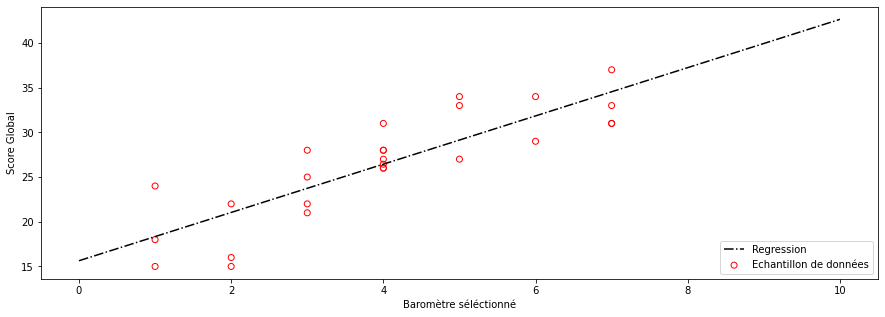

In [61]:
#plt.plot(df2[[D[ba]]], df2[['Score_Global']],'^', color='black')
plt.figure(figsize=(15,5))
x=np.linspace(0,10,num=200)
y=m[0]*x+b[0]
plt.scatter(df3[[D[ba]]], df3[['Score_Global']],facecolors='none', edgecolors='red',label="Echantillon de données")
#plt.plot(np.array(df3[[D[ba]]]), np.array(df3[['Score_Global']]))
plt.plot(x,y,'-.',color='black',label="Regression")
plt.legend(loc='lower right')
plt.xlabel("Baromètre séléctionné")
plt.ylabel("Score Global")


In [62]:
series=df3['Score_Global'].reset_index()
series.drop(columns=['index'],inplace=True)
window=5

rolling_mean = series.rolling(window=window).mean()

#plt.figure(figsize=(15,5))
#plt.title("Moving average\n window size = {}".format(window))
#plt.plot(rolling_mean, "g", label="Rolling mean trend")
x=np.linspace(0,25,num=200)
y=m[0]*x+b[0]
#plt.plot(x,y,'-.',color='black')
#plt.scatter(df3[[D[1]]], df3[['Score_Global']],facecolors='none', edgecolors='red')
#plt.plot(series[window:], label="Vraies valeurs")


In [63]:
# using the equation of the line to get y values
predictions = model.predict(df3[[D[ba]]])
predictions[0:5]

array([[23.74],
       [18.34],
       [18.34],
       [21.04],
       [21.04]])

In [64]:
# making a DataFrame for the predictions
predictions = pd.DataFrame(data = predictions, index = df3.index.values, columns = ['Pred'])
predictions.head()

,Pred
0,23.74
1,18.34
2,18.34
3,21.04
4,21.04


In [65]:
# join and concat documentation
# http://pandas.pydata.org/pandas-docs/stable/merging.html

joined_df = df3.join(predictions, how = 'inner')
joined_df['Rolling_Mean'] = joined_df['Score_Global'].rolling(window = 5).mean()
joined_df=joined_df.drop([0,1,2,3])
joined_df


,user_uuid,Date_Creation,Qualité du sommeil sur la semaine écoulée,Moral sur la semaine écoulée,Fatigue/Énergie sur la semaine écoulée,Sensation de confort corporel sur la semaine écoulée,Anxiété sur la semaine écoulée,Douleur moyenne sur la semaine écoulée,Score_Global,Pred,Rolling_Mean
4,3f25029fcecf4fe3865d4af31f1f5574,2019-05-13T00:00:53.672126+02:00,1.00,1.0,1.00,2.00,8.00,2.0,15.00,21.04,17.000
5,3f25029fcecf4fe3865d4af31f1f5574,2019-05-20T00:00:00.599063+02:00,2.00,7.0,2.00,3.00,9.00,4.0,27.00,26.44,18.200
6,3f25029fcecf4fe3865d4af31f1f5574,2019-05-27T00:00:42.735778+02:00,1.00,8.0,1.00,2.00,10.00,4.0,26.00,26.44,20.400
7,3f25029fcecf4fe3865d4af31f1f5574,2019-06-03T00:00:38.442274+02:00,1.00,7.0,1.00,1.00,10.00,2.0,22.00,21.04,21.200
8,3f25029fcecf4fe3865d4af31f1f5574,2019-06-10T00:00:32.034495+02:00,1.00,5.0,1.00,2.00,10.00,3.0,22.00,23.74,22.400
9,3f25029fcecf4fe3865d4af31f1f5574,2019-06-17T00:00:33.781735+02:00,2.00,7.0,1.00,2.00,10.00,3.0,25.00,23.74,24.400
10,3f25029fcecf4fe3865d4af31f1f5574,2019-06-24T00:00:52.406460+02:00,4.00,7.0,1.00,1.00,10.00,1.0,24.00,18.34,23.800
11,3f25029fcecf4fe3865d4af31f1f5574,2019-07-01T00:00:36.882892+02:00,3.00,8.0,3.00,3.00,10.00,4.0,31.00,26.44,24.800
12,3f25029fcecf4fe3865d4af31f1f5574,2019-07-08T00:00:38.402368+02:00,3.00,6.0,3.00,2.00,10.00,4.0,28.00,26.44,26.000
13,3f25029fcecf4fe3865d4af31f1f5574,2019-07-15T00:00:30.952243+02:00,4.00,7.0,4.00,2.00,8.00,3.0,28.00,23.74,27.200


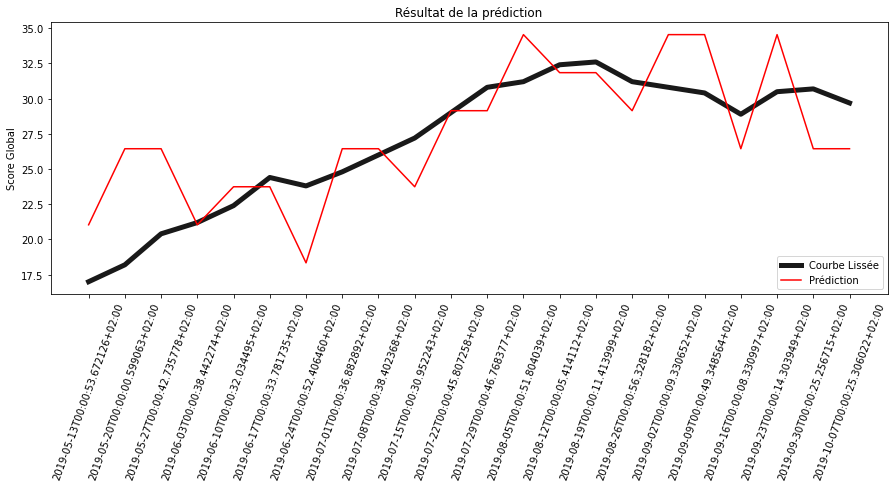

In [66]:
fig = plt.figure(figsize=(15,5));
ax = fig.add_subplot(111);
ax.plot(joined_df['Date_Creation'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 5, alpha = .9, label = 'Courbe Lissée');
ax.plot(joined_df['Date_Creation'], joined_df['Pred'], color = (1,0,0), label = 'Prédiction');
plt.xticks(rotation=70)
ax.set_title('Résultat de la prédiction')
plt.ylabel('Score Global')
ax.legend(loc='lower right');

In [67]:
r_squared = sk.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Pred'],multioutput='uniform_average')
r_squared

0.43461374286833576